# Case 1

02582 Computational Data Analysis

February 2025 _ Due on 30 March, 2025 11:59 PM

## Case 1

The data for this exercise consist of 100 observations $(y, x)$, of response $Y$ (vector), features $X$ (100-dimensional feature matrix). Further, we have 1000 additional observations, here denoted $x_{new}$. Data is presented in the `.csv` files

`case1Data.csv`

and

`case1Data_Xnew.csv`

which are found on the course page on DTU learn, under Assignments. You can use any programming language you prefer e.g. R, Python or matlab. You can choose the methods you find suited to solve the case, please argue for your choices in the report. You should work in groups of **no more than two people**. In short your task is to build a predictive model of $Y$ based on $X$. Argue your choices and assess the quality of the chosen model. Apart from your predictions, $\hat{y}_{new}$, you should also estimate your prediction error. To complete this case you have to hand in three documents.

* A report on the case (max 5 pages, all included).

* Your predictions $\hat{y}_{new}$ (in a file called

`predictions_YourStudentNos.csv`

; please insert your student numbers as a replacement for `YourStudentNos`).

* Your estimated prediction error RMSE (in a file called

`estimatedRMSE_YourStudentNos.csv`

The requirements for the documents are described in greater detail in the following sections.


## The report

Your report should be short (No more than max 5 pages), in pdf format.
Please use the provided latex template

`case1reportTemplate.pdf`

without modifying the margin and dimensions, for a fair comparison. The
report should answer to the following items:

* Describe your model and method (including model selection and validation).

* Argue for your choices of model, model selection and validation.

* Describe how you handled missing data.

* Describe how you handled factors in the features (categorical variables).

* Estimate the predictive performance of your model on $x_{new}$. We are interested in the root mean squared error $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$. As you do not know the true values $y_{new}$, you cannot just calculate the error, you need to estimate it. Your $RMSE$ estimate will be denoted $RMSE$. Describe what you did.

## The predictions and estimated prediction error

Your predictions $\hat{y}_{new}$ and your estimated prediction error $RMSE$ should be uploaded to DTU inside in two text files. $\hat{y}_{new}$ in a file named

`predictions_YourStudentNos.csv`

and

`estimatedRMSE_YourStudentNos.csv`

The formats are illustrated in

`sample_predictions_YourStudentNo.csv`

and

`sample_estimatedRMSE_YourStudentNo.csv`

Please do not include headers in the file. Your predictions $\hat{y}_{new}$ and $RMSE$ will be evaluated by the teachers.

## The competition

There is no case study without a great competition - actually we have two. There will be a prize for the group who submits the best predictions $\hat{y}_{new}$ in terms of their $RMSE$ (calculated by the teacher). The other prize goes to the group who gives the closest estimate $RMSE$ to their actual $RMSE$ (measured in percent deviation and again calculated by the teacher). The winner will be announced at the lectures.

# Report Structure

<small>
    
## Introduction/Data Description
- Brief problem formulation and an overview of data.

## Model and Method
- Here is the approach we took and the models we tried and why.

## Model Selection
- This is how we performed model selection.

## Missing Values
- This is how we handled missing values...

## Factor Handling
- This is how we handled factor (categorical) variables...

## Model Validation
- This is how we performed our model validation and estimated the EPE.

## Results
- This is my chosen model (the best model)...
- Those are our results and our estimate of the EPE (given as an estimate of RMSE).
</small>



**Assignment Plan Table**

| **Phase**                      | **Tasks**                                                                      | **Focus**                                                                  |
|-------------------------------|-------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Phase 1: Understanding & Exploration** | 1.  Assignment Description                           | Understanding objectives, deliverables, challenges                       |
|                               | 2. Data Exploration & Initial Setup                                          | initial EDA, identifying data structure, missing values    |
|                               | 3. Plan of Action & Model Ideas                                               | Brainstorming models, outlining report structure, task division          |
| **Phase 2: Preprocessing & Model Building** | 4. Missing Value Handling                                                      | Choosing and implementing imputation methods, documenting choices      |
|                               | 5. Factor (Categorical) Variable Handling                                     | Choosing and implementing encoding, documenting choices                   |
|                               | 6. Model Implementation & Training                                           | Implementing chosen models, training on data                               |
|                               | 7. Model Selection & Hyperparameter Tuning                                  | Model selection strategy, hyperparameter tuning, selecting best model   |
| **Phase 3: Validation, Prediction & Report** | 8. Model Validation & Error Estimation                                    | Validating best model, estimating RMSE                                  |
|                               | 9. Prediction Generation                                                        | Preprocessing xnew, generating predictions ynew, saving predictions       |
|                               | 10. Report Writing                                                              | Writing all report sections        |
| **Phase 4: Finalization & Submission** | 11. Final Checks & Submission                                              | Reviewing deliverables, final submission                                  |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import pandas as pd

import category_encoders as ce 
from scipy.stats import mode
from sklearn.experimental import enable_iterative_imputer


import warnings
from sklearn.model_selection import KFold



from sklearn.preprocessing import StandardScaler

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set()  # Set seaborn as default

In [3]:
# Read data from csv file, headers have spaces in them
data = pd.read_csv('case1Data.csv', sep=",")
x_new = pd.read_csv('case1Data_Xnew.csv', sep=",")

In [5]:
print("Shape", data.shape)
# convert datatypes
data = data.apply(lambda x: x.astype('float64') if 'x' in x.name else x)
data = data.apply(lambda x: x.astype('category') if 'C' in x.name else x)
data.head()

Shape (100, 101)


,y,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,375.823073,6.359019,-13.367120,-2.483750,-6.641891,11.733539,NaN,-17.085361,22.194764,16.827888,...,-10.200888,3.980048,-4.433274,-1.473723,NaN,74.0,72.0,72.0,73.0,73.0
1,266.811730,3.873664,-8.470389,-3.055012,NaN,11.420983,1.822330,-13.694100,22.738654,20.307503,...,-9.740207,NaN,-2.629314,4.816987,-12.240248,74.0,72.0,72.0,73.0,73.0
2,267.271759,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,NaN,15.963889,...,-14.501970,10.054005,NaN,NaN,-11.107921,73.0,72.0,75.0,74.0,74.0
3,219.951294,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,...,-11.086963,2.019726,-8.531959,3.520833,NaN,71.0,72.0,73.0,71.0,72.0
4,289.697954,3.116458,-8.518713,-6.796050,NaN,7.646285,-3.118309,-13.102567,22.801217,16.680208,...,-9.117422,6.627601,-2.805531,5.914351,-11.240573,72.0,72.0,72.0,74.0,75.0


Number of features with missing values: 100
Total number of missing values: 1,489


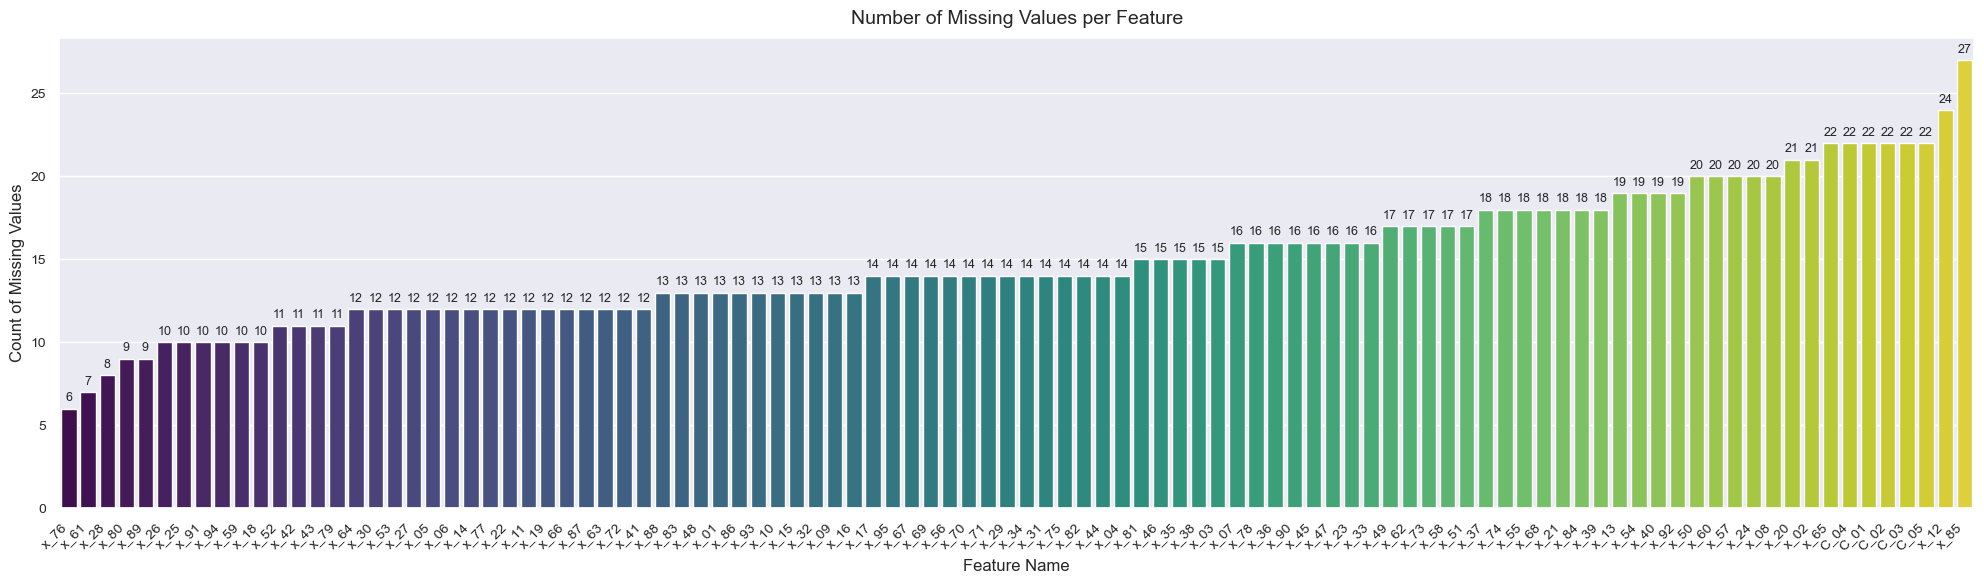

In [13]:
# Count plot of variables with missing values
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate missing values
missing = data.isnull().sum()
missing = missing[missing > 0]  # Filter features with at least one missing value

# Print summary statistics
print(f"Number of features with missing values: {missing.shape[0]}")
print(f"Total number of missing values: {missing.sum():,}")

# Sort values for better visualization
missing = missing.sort_values(ascending=True)

# Create the plot
plt.figure(figsize=(20, 6))
sns.barplot(x=missing.index, y=missing.values, hue=missing.index, palette='viridis', legend=False)

# Customize the plot
plt.title("Number of Missing Values per Feature", fontsize=14, pad=10)
plt.xlabel("Feature Name", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of bars
for i, v in enumerate(missing.values):
    plt.text(i, v + max(missing.values)*0.01, f'{v:,}', 
             ha='center', va='bottom', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()

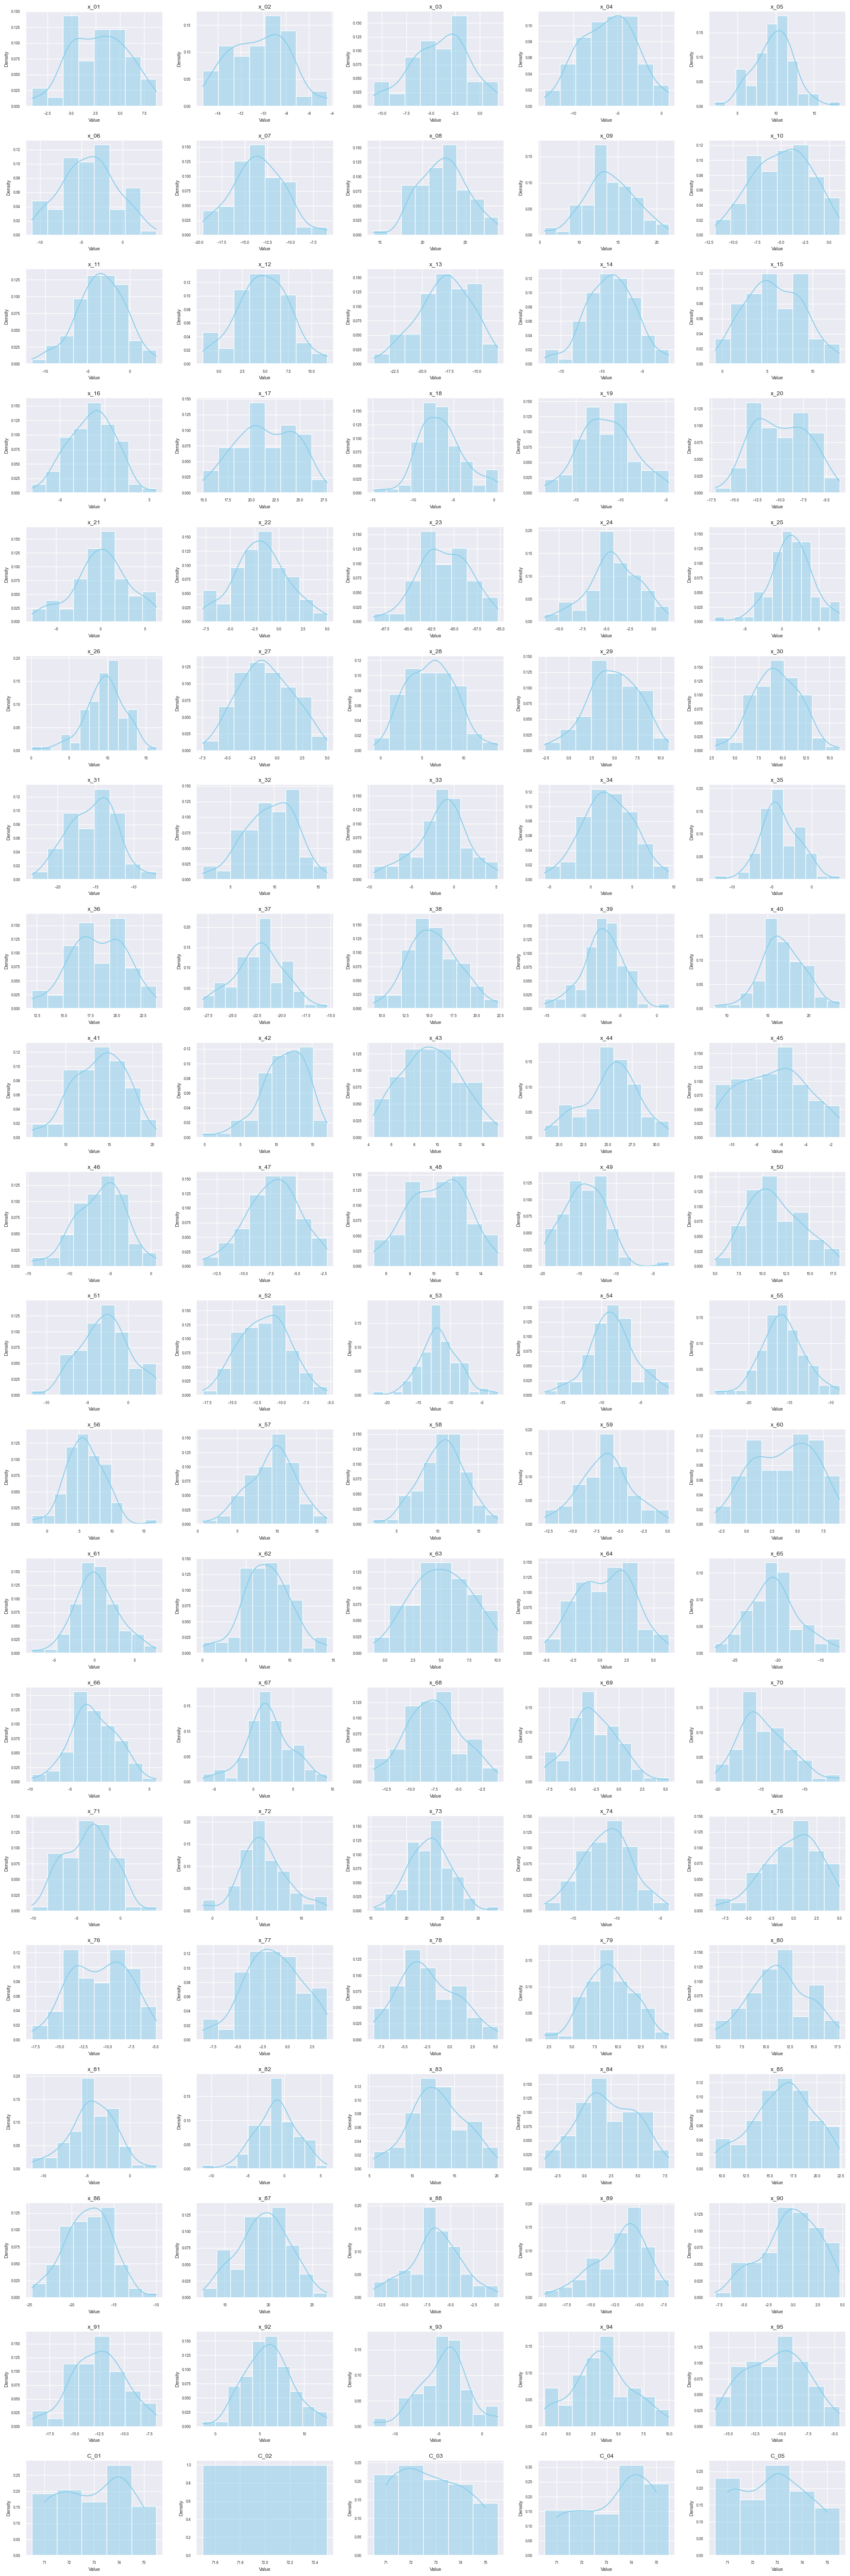

Number of features with missing values plotted: 100


In [15]:
# Histogram of each feature with missing values
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter features with missing values (excluding 'y')
features = [col for col in data.columns if col != 'y' and data[col].isnull().sum() > 0]

# Dynamically calculate grid size based on number of features
n_features = len(features)
n_cols = min(5, n_features)  # Max 5 columns for readability
n_rows = int(np.ceil(n_features / n_cols))  # Calculate required rows

# Create figure with dynamic size
plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Adjust size based on grid

# Plot histograms
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[feature], kde=True, color='skyblue', stat='density')  # Added color and density
    plt.title(feature, fontsize=10, pad=5)
    plt.xlabel('Value', fontsize=8)  # Added label for clarity
    plt.ylabel('Density', fontsize=8)  # Changed to density for kde
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

# Adjust layout to prevent overlap
plt.tight_layout(pad=1.5)
plt.show()

# Print summary
print(f"Number of features with missing values plotted: {n_features}")

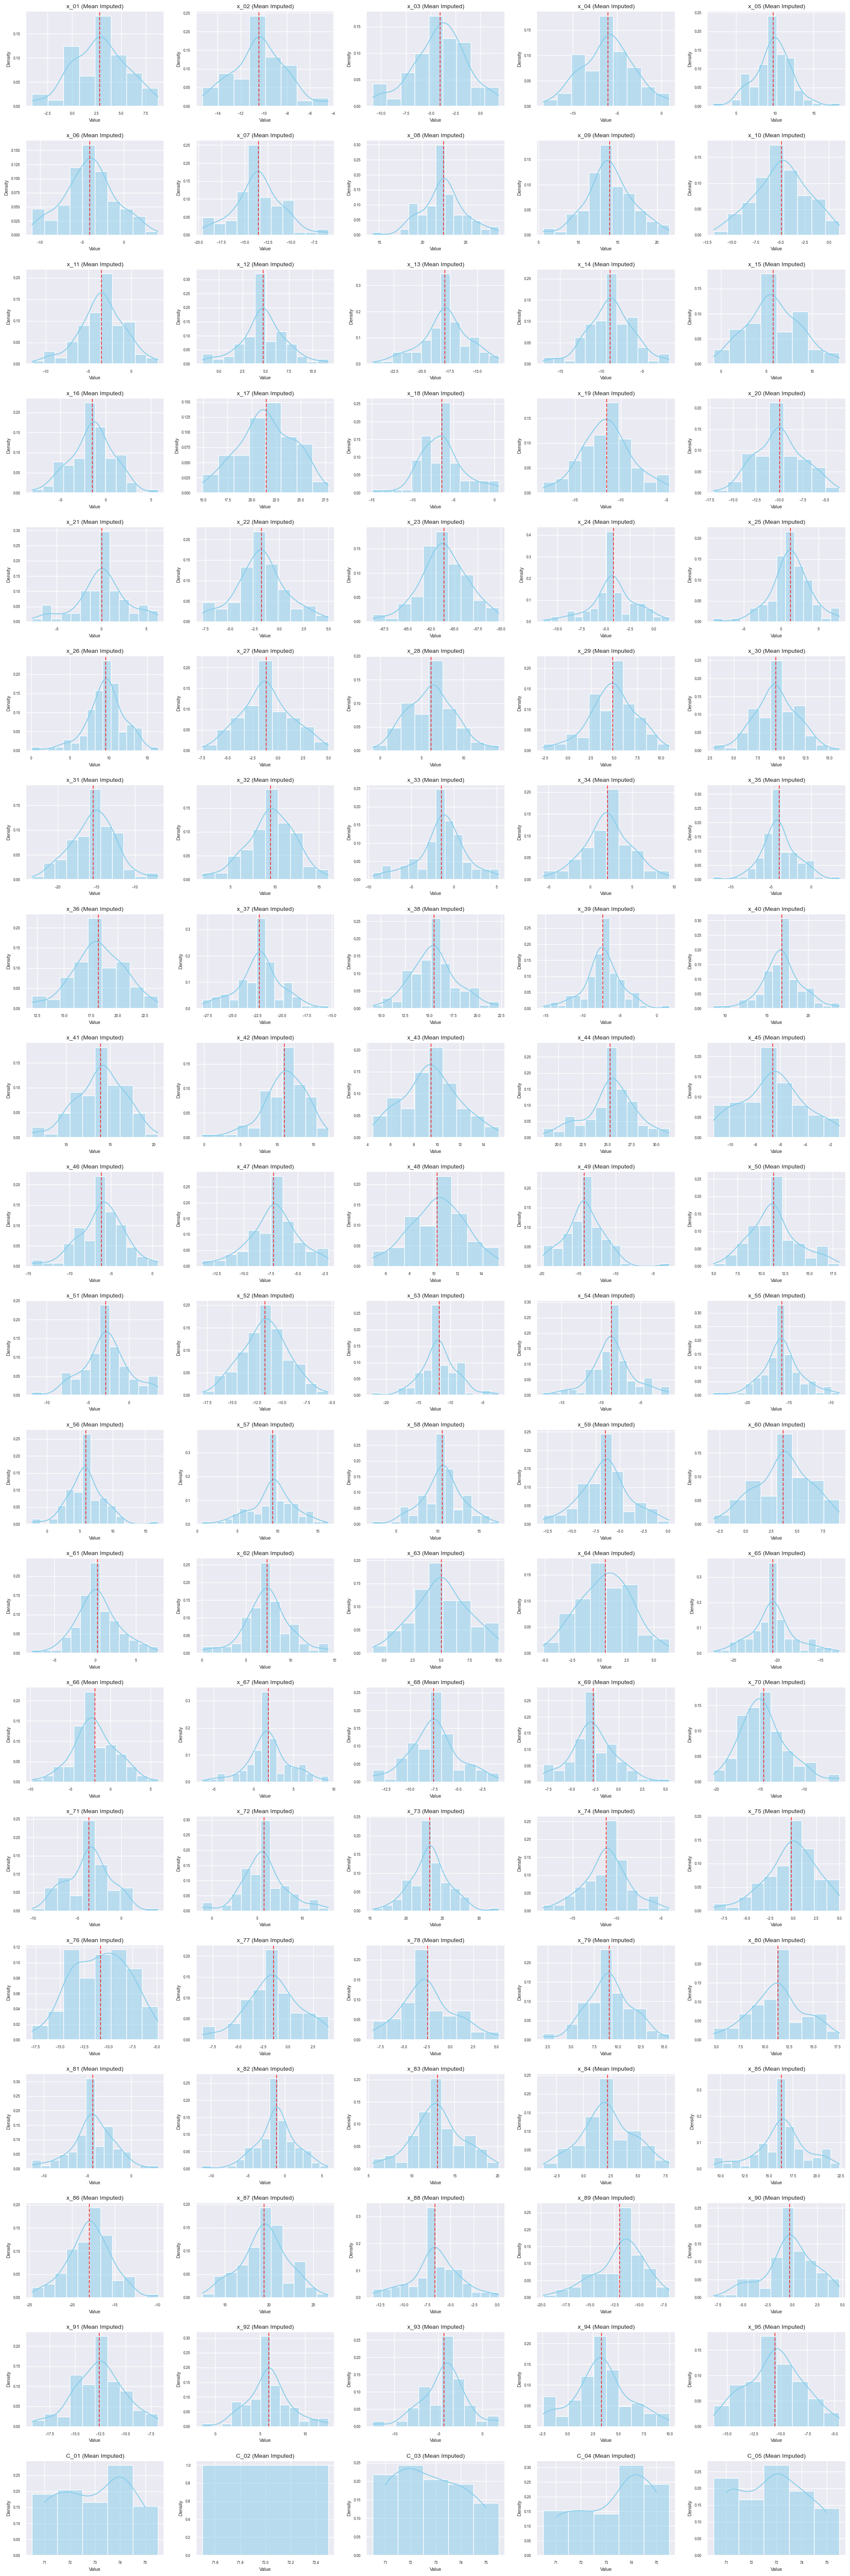

Number of features imputed with mean: 95
Imputed features: ['x_01', 'x_02', 'x_03', 'x_04', 'x_05', 'x_06', 'x_07', 'x_08', 'x_09', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_92', 'x_93', 'x_94', 'x_95']


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Impute missing values with mean for float64 features
for feature in features:
    if data[feature].dtype == 'float64':
        data[feature] = data[feature].fillna(data[feature].mean())

# Histogram of each feature after filling missing values with mean
# Filter features (assuming features is already defined, e.g., from previous code)
n_features = len(features)
n_cols = min(5, n_features)  # Max 5 columns for readability
n_rows = int(np.ceil(n_features / n_cols))  # Dynamic rows

# Create figure with dynamic size
plt.figure(figsize=(n_cols * 4, n_rows * 3))

# Plot histograms
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[feature], kde=True, color='skyblue', stat='density')
    plt.title(f"{feature} (Mean Imputed)", fontsize=10, pad=5)
    plt.xlabel('Value', fontsize=8)
    plt.ylabel('Density', fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    # Add mean line for float64 features
    if data[feature].dtype == 'float64':
        plt.axvline(data[feature].mean(), color='red', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout(pad=1.5)
plt.show()

# Print summary of imputation
imputed_features = [f for f in features if data[f].dtype == 'float64']
print(f"Number of features imputed with mean: {len(imputed_features)}")
print(f"Imputed features: {imputed_features}")

In [21]:
nan_counts = data.isnull().sum(axis=1)
nan_counts.value_counts()
df_drop = data[nan_counts <= 20]
df_drop

,y,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,375.823073,6.359019,-13.367120,-2.483750,-6.641891,11.733539,-4.057966,-17.085361,22.194764,16.827888,...,-10.200888,3.980048,-4.433274,-1.473723,-10.545234,74.0,72.0,72.0,73.0,73.0
1,266.811730,3.873664,-8.470389,-3.055012,-6.029949,11.420983,1.822330,-13.694100,22.738654,20.307503,...,-9.740207,5.967559,-2.629314,4.816987,-12.240248,74.0,72.0,72.0,73.0,73.0
2,267.271759,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,22.439790,15.963889,...,-14.501970,10.054005,-4.363874,3.350329,-11.107921,73.0,72.0,75.0,74.0,74.0
3,219.951294,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,...,-11.086963,2.019726,-8.531959,3.520833,-10.545234,71.0,72.0,73.0,71.0,72.0
4,289.697954,3.116458,-8.518713,-6.796050,-6.029949,7.646285,-3.118309,-13.102567,22.801217,16.680208,...,-9.117422,6.627601,-2.805531,5.914351,-11.240573,72.0,72.0,72.0,74.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,179.496446,0.068763,-13.641936,-10.840247,-7.940555,6.429727,-9.573881,-14.778257,21.290921,8.128314,...,-14.104077,1.859479,-9.569323,3.104148,-15.442839,74.0,72.0,73.0,72.0,73.0
96,161.037072,1.491110,-14.347095,-4.056112,-8.246338,10.170677,-4.057966,-16.003159,23.579735,12.688034,...,-19.050006,3.847112,-6.446968,0.281087,-14.840473,72.0,72.0,73.0,71.0,73.0
97,140.437828,-3.965484,-9.453867,-9.903336,-10.641552,8.570113,-4.057966,-11.488808,18.958736,10.115323,...,-19.259988,5.967559,-8.666655,2.843539,-10.545234,74.0,72.0,73.0,74.0,73.0
98,202.443713,0.709377,-9.807318,-6.803646,-4.259225,11.406617,-1.232783,-10.300590,21.074819,12.448371,...,-17.866896,5.967559,-6.440458,4.119420,-10.105708,75.0,72.0,74.0,72.0,73.0
